# **Exploratory Data Analysis EDA**

## Objectives

* Explore the dataset
* Visualise the data with charts
* Investigate hypotheses

## Inputs

* Cleaned dataset 

## Outputs

* Charts and visuals


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [9]:
import os
current_dir = os.getcwd()
current_dir


'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Student-Academic-Performance\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [10]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [11]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tb975\\OneDrive\\Documents\\vs_code_projects\\Student-Academic-Performance'

# Overview of the Data

In this notebook I will be visualising the data with some charts. 
I will also be considering my hypotheses.

## Hypotheses

- H1
- H2
- H3
- H4

In [13]:
#import libraries for data visualisation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

First step read the cleaned dataset into a pandas dataframe

In [ ]:
#read cleaned dataset into dataframe
df = pd.read_csv('data/academic_performance_cleaned.csv')
#view first 10 rows
df.head(10)

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score,Study Group
0,84,30,36,7,3,72,33.0,low
1,91,24,38,6,3,56,31.0,low
2,73,29,26,7,3,56,27.5,low
3,80,36,35,7,3,74,35.5,low
4,84,31,37,8,3,66,34.0,low
5,100,34,34,7,3,79,34.0,low
6,96,40,36,8,3,83,38.0,low
7,83,39,37,7,3,77,38.0,low
8,91,30,37,8,2,71,33.5,low
9,87,27,37,8,3,61,32.0,low


A reminder of the basic information, including data types. When the cleaned CSV is saved and read into this new notebook the data types revert back to int64, so I will convert them to int8 again. This is not absolutely necessary with this project as the dataset is not too large, but this may be a useful step with an enormous dataset to save memory and time.
I will also convert the study group datatype from object to category. 

In [19]:
#show data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Attendance (%)                 2000 non-null   int64  
 1   Internal Test 1 (out of 40)    2000 non-null   int64  
 2   Internal Test 2 (out of 40)    2000 non-null   int64  
 3   Assignment Score (out of 10)   2000 non-null   int64  
 4   Daily Study Hours              2000 non-null   int64  
 5   Final Exam Marks (out of 100)  2000 non-null   int64  
 6   Average Test Score             2000 non-null   float64
 7   Study Group                    2000 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 125.1+ KB


In [22]:
#loop through columns with int64 and change the datatype to int8
df = df.astype({col: 'int8' for col in df.select_dtypes('int64').columns})

#loop through them and convert datatypes to category
df = df.astype({col: 'category' for col in df.select_dtypes('object').columns})
#display datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Attendance (%)                 2000 non-null   int8    
 1   Internal Test 1 (out of 40)    2000 non-null   int8    
 2   Internal Test 2 (out of 40)    2000 non-null   int8    
 3   Assignment Score (out of 10)   2000 non-null   int8    
 4   Daily Study Hours              2000 non-null   int8    
 5   Final Exam Marks (out of 100)  2000 non-null   int8    
 6   Average Test Score             2000 non-null   float64 
 7   Study Group                    2000 non-null   category
dtypes: category(1), float64(1), int8(6)
memory usage: 29.5 KB


A reminder of the summary statistics. All values are realistic, not too high or low.

In [23]:
#summary statistics
df.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Average Test Score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000,32.29000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265,3.61091
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000,19.50000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000,30.00000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000,32.50000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000,35.00000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000,40.00000


I will investigate the distribution of the numerical columns in this dataset using histograms. 

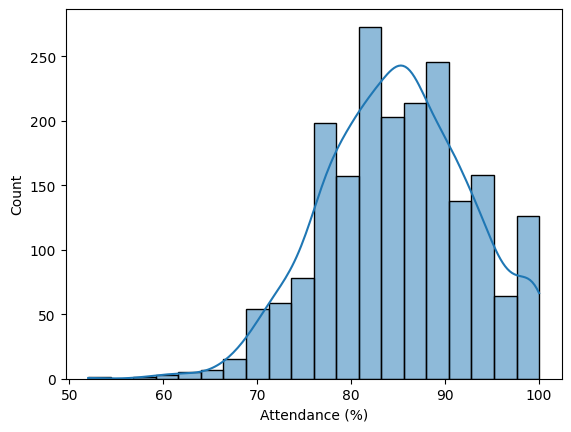

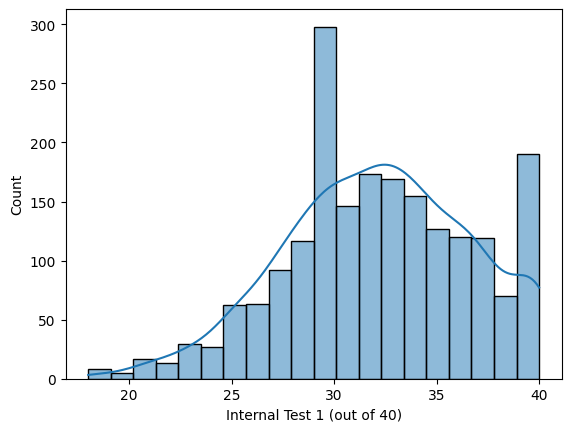

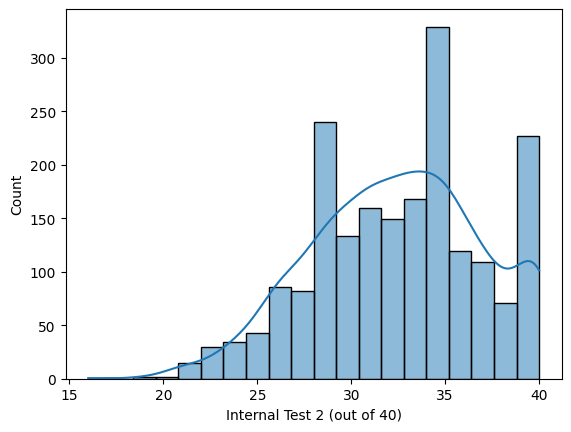

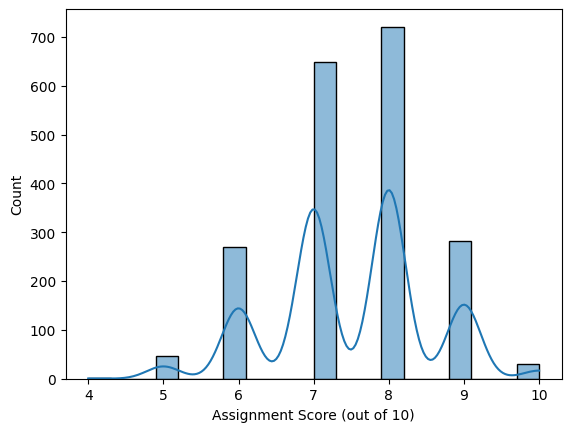

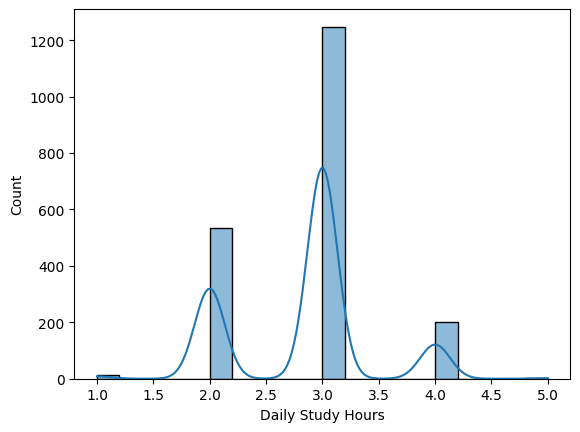

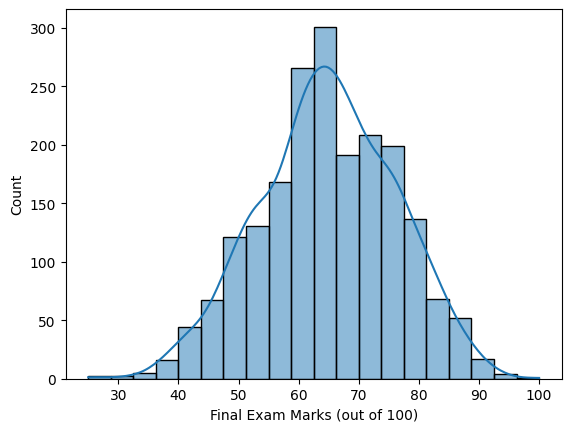

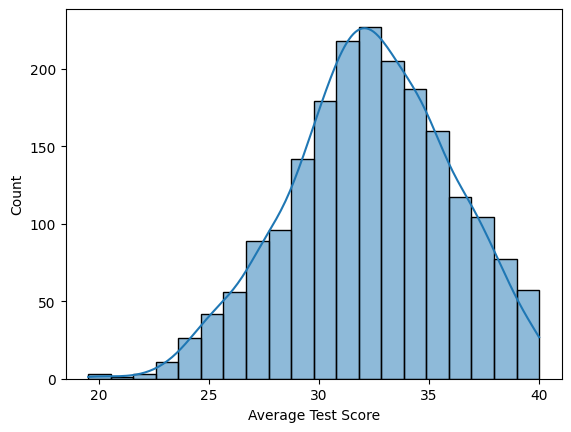

In [ ]:
#store numerical column names in a list called num_cols
num_cols = df.select_dtypes(['int8','float64']).columns

#loop over the columns and plot a historgram for each
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.show()



---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
